<a href="https://colab.research.google.com/github/Sri-spec/PIMA-Indian-Diabetes/blob/main/Penguins_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Palmer Archipelago (Antarctica) penguin data.

### Data Source: Dr. Kirtsten Gorman and Palmer Station, Antartica, LTER.

#### Problem Statement: We compare different physical aspects of Penguins  like, body mass, flipper length, culmen length, culmen depth to predict the species of the Penguin.

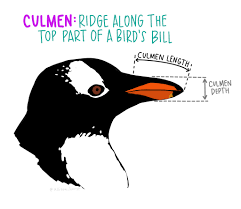


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins.csv


In [ ]:
df = pd.read_csv("penguins.csv")



In [ ]:
df

,species,island,Region,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion,Date Egg
0,Adelie,Torgersen,Anvers,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Yes,11/11/2007
1,Adelie,Torgersen,Anvers,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,Yes,11/11/2007
2,Adelie,Torgersen,Anvers,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,Yes,11/16/2007
3,Adelie,Torgersen,Anvers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,11/16/2007
4,Adelie,Torgersen,Anvers,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,Yes,11/16/2007
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,Anvers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,12/1/2009
340,Gentoo,Biscoe,Anvers,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,Yes,11/22/2009
341,Gentoo,Biscoe,Anvers,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,Yes,11/22/2009
342,Gentoo,Biscoe,Anvers,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,Yes,11/22/2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   Region             344 non-null    object 
 3   culmen_length_mm   342 non-null    float64
 4   culmen_depth_mm    342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                334 non-null    object 
 8   Delta 15 N (o/oo)  330 non-null    float64
 9   Delta 13 C (o/oo)  331 non-null    float64
 10  Clutch Completion  344 non-null    object 
 11  Date Egg           344 non-null    object 
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


In [ ]:
df.shape

(344, 12)

In [ ]:
df.dtypes

species               object
island                object
Region                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
Delta 15 N (o/oo)    float64
Delta 13 C (o/oo)    float64
Clutch Completion     object
Date Egg              object
dtype: object

In [ ]:
missing_values = ["NA", "NAN", "n/a", "na", "Empty", "--"]

In [ ]:
df = pd.read_csv("penguins.csv", na_values = missing_values)

In [ ]:
df.isnull().any() # shows which column missing values are exactly found. There are 7 columns with null values

species              False
island               False
Region               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
Delta 15 N (o/oo)     True
Delta 13 C (o/oo)     True
Clutch Completion    False
Date Egg             False
dtype: bool

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().any()

species              False
island               False
Region               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                   True
Delta 15 N (o/oo)    False
Delta 13 C (o/oo)    False
Clutch Completion    False
Date Egg             False
dtype: bool

In [ ]:
def binarize_sex(val):
    if val == 'Male':
        return 1
    else:
        return 0   

In [ ]:
df['sex'] = df['sex'].apply(binarize_sex)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().any()

species              False
island               False
Region               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
Delta 15 N (o/oo)    False
Delta 13 C (o/oo)    False
Clutch Completion    False
Date Egg             False
dtype: bool

In [ ]:
df.isna().sum()

species              0
island               0
Region               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
Delta 15 N (o/oo)    0
Delta 13 C (o/oo)    0
Clutch Completion    0
Date Egg             0
dtype: int64

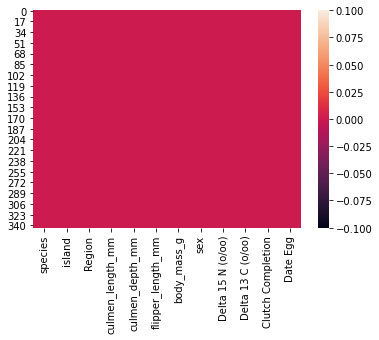

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

df=df.dropna()
sns.heatmap(df.isna())
plt.show()

# Summary statistics

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.000000,344.000000,344.000000,344.0,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.0,8.733382,-25.686292
std,5.443643,1.969027,14.020657,799.613058,0.0,0.540392,0.778770
min,32.100000,13.100000,172.000000,2700.000000,0.0,7.632200,-27.018540
25%,39.275000,15.600000,190.000000,3550.000000,0.0,8.307415,-26.285460
50%,44.250000,17.300000,197.000000,4050.000000,0.0,8.687455,-25.793660
75%,48.500000,18.700000,213.000000,4750.000000,0.0,9.136170,-25.089467
max,59.600000,21.500000,231.000000,6300.000000,0.0,10.025440,-23.787670


# Describe the column names:

In [ ]:
df.columns  # Delta 15 N is  a number denoting the measure of the ratio of stable isotopes 15N

Index(['species', 'island', 'Region', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Clutch Completion', 'Date Egg'],
      dtype='object')

In [ ]:
 df['culmen_depth_mm'].mean()
      

17.151169590643274

In [ ]:
df['culmen_depth_mm'].mean()

17.151169590643274

In [ ]:
df['culmen_length_mm'].mean()

43.92192982456141

In [ ]:
df['body_mass_g'].median()

4050.0

In [ ]:
df['species'].count()

344

In [ ]:
df.head()

,species,island,Region,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion,Date Egg
0,Adelie,Torgersen,Anvers,39.10000,18.70000,181.000000,3750.000000,0,8.733382,-25.686292,Yes,11/11/2007
1,Adelie,Torgersen,Anvers,39.50000,17.40000,186.000000,3800.000000,0,8.949560,-24.694540,Yes,11/11/2007
2,Adelie,Torgersen,Anvers,40.30000,18.00000,195.000000,3250.000000,0,8.368210,-25.333020,Yes,11/16/2007
3,Adelie,Torgersen,Anvers,43.92193,17.15117,200.915205,4201.754386,0,8.733382,-25.686292,Yes,11/16/2007
4,Adelie,Torgersen,Anvers,36.70000,19.30000,193.000000,3450.000000,0,8.766510,-25.324260,Yes,11/16/2007


# Data Visualization
### Penguins & their distribtution in Antartica

In [ ]:
import matplotlib.pyplot as plt

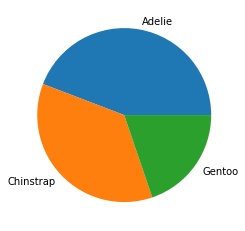

In [ ]:
plt.pie(df["species"].value_counts(),labels = df["species"].unique())
plt.show()

In [ ]:
p = sns.load_dataset('penguins')

In [ ]:
c = p.groupby('species')['species'].count()

In [ ]:
c

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


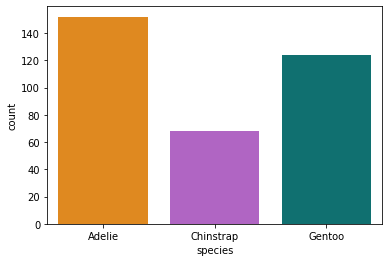

In [ ]:
sns.countplot('species',data=p, palette=('DarkOrange', 'MediumOrchid', 'Teal'))
plt.show()

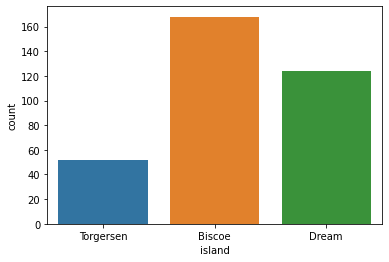

In [ ]:
sns.countplot(x = "island", data = p)

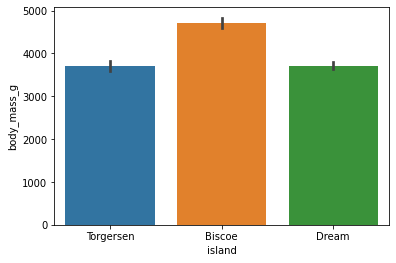

In [ ]:
sns.barplot(x = "island", y = "body_mass_g", data = p)

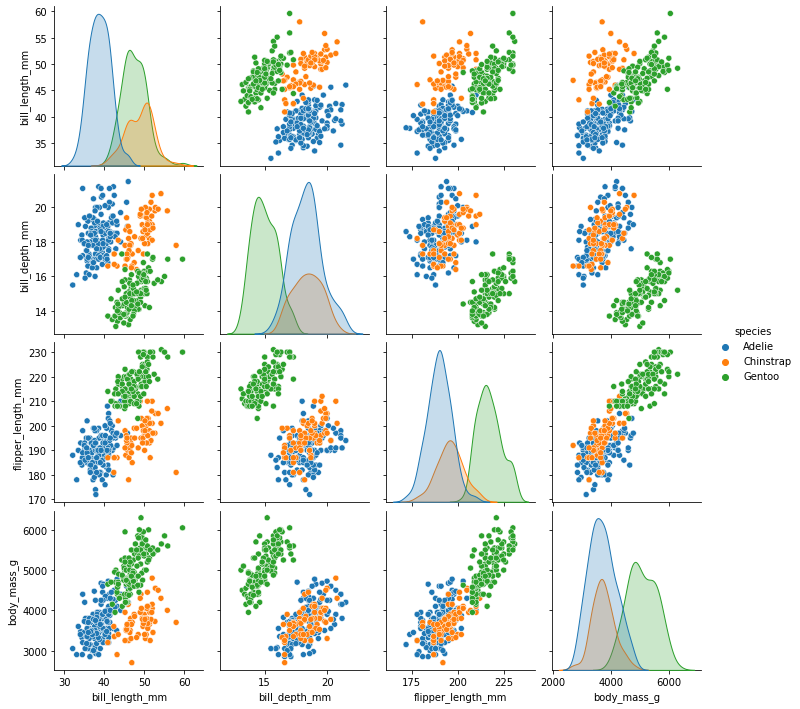

In [ ]:
sns.pairplot(data = p, hue='species', palette=None)

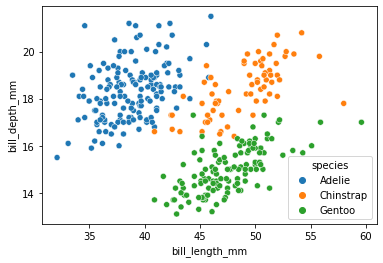

In [ ]:
sns.scatterplot(x = p.bill_length_mm, y = p.bill_depth_mm, hue = p.species, palette=None)

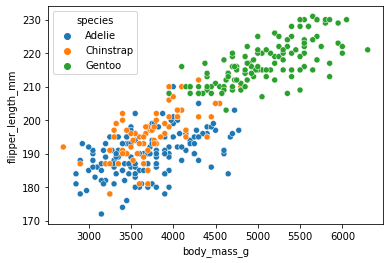

In [ ]:
sns.scatterplot(x = p.body_mass_g, y = p.flipper_length_mm, hue = p.species, palette=None)

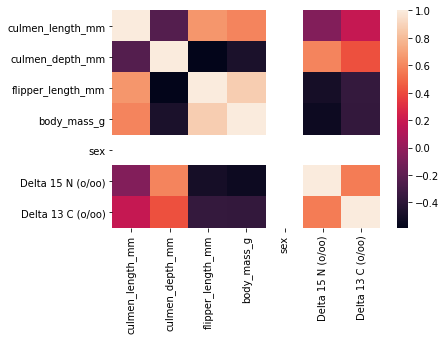

In [ ]:
sns.heatmap(df.corr())

# Data Partition

In [ ]:
X_train.dtypes

species               object
island                object
Region                object
culmen_length_mm     float64
sex                    int64
Delta 15 N (o/oo)    float64
Delta 13 C (o/oo)    float64
Clutch Completion     object
Date Egg              object
dtype: object

In [ ]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=1000)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)





(670, 2) (330, 2) (670,) (330,)


In [ ]:
parameters = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex',	'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
result = "species"


In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(df[parameters], df[result])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(df[parameters], df[result])

0.997093023255814

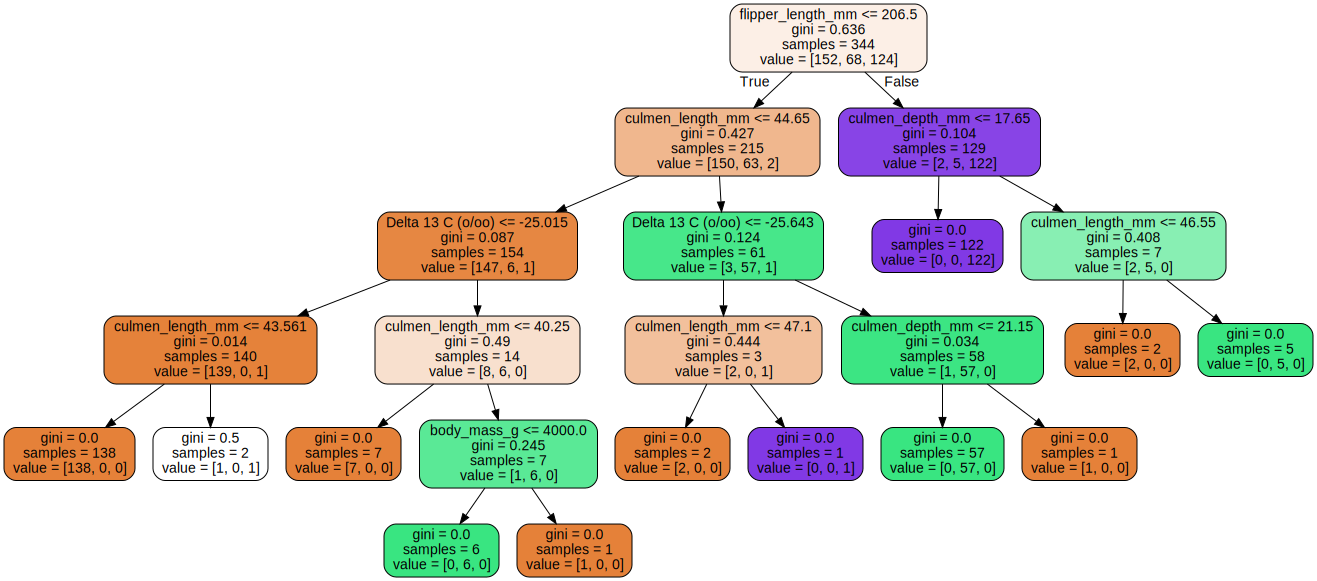

In [ ]:
dot_data = tree.export_graphviz(model, feature_names=parameters, filled=True, rounded=True) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
list(zip(parameters, model.feature_importances_))

[('culmen_length_mm', 0.37287254604043296),
 ('culmen_depth_mm', 0.05743618187396302),
 ('flipper_length_mm', 0.5210554427945732),
 ('body_mass_g', 0.007874616570268746),
 ('sex', 0.0),
 ('Delta 15 N (o/oo)', 0.0),
 ('Delta 13 C (o/oo)', 0.04076121272076198)]

### Questions for further analysis

1. Role the isotope Delta N plays in the Penguin Population size?

2. Clutch completion does it always result in increase in population numbers?

